In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
yen_futures = pd.read_csv('yen.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
yen_futures.head(3)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [3]:
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


<AxesSubplot:xlabel='Date'>

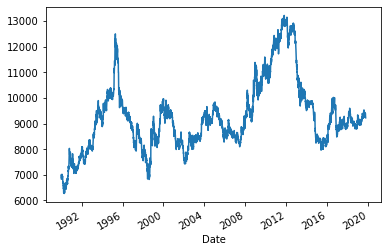

In [4]:
yen_futures['Settle'].plot()

In [5]:
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

<AxesSubplot:xlabel='Date'>

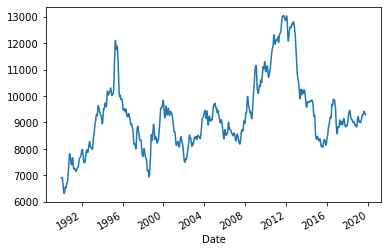

In [6]:
ts_trend.plot()

<AxesSubplot:xlabel='Date'>

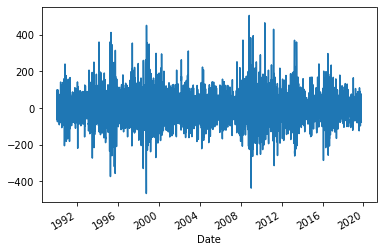

In [7]:
ts_noise.plot()

In [8]:
new_yen = yen_futures[['Settle']]
new_yen['Noise'] = ts_noise
new_yen['Trend'] = ts_trend
new_yen.head(5)

<ipython-input-8-6694dd82d3ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yen['Noise'] = ts_noise
<ipython-input-8-6694dd82d3ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yen['Trend'] = ts_trend


,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


In [9]:
new_yen = new_yen.loc["2015-01-01":, :]

<AxesSubplot:title={'center':'Settle vs. Trend'}, xlabel='Date'>

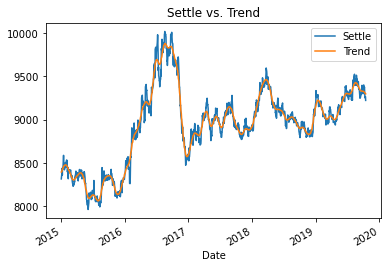

In [10]:
new_yen[['Settle','Trend']].plot(title = "Settle vs. Trend")

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

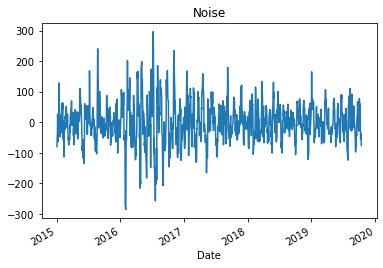

In [11]:
new_yen['Noise'].plot(title = "Noise")

In [12]:
# Forecasting Returns using an ARMA Model

In [13]:
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [14]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

<AxesSubplot:xlabel='Date'>

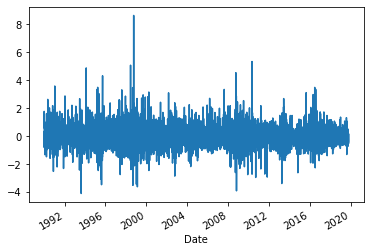

In [15]:
# data is stationary
returns["Settle"].plot()

In [16]:
model = ARMA(returns["Settle"].values, order=(2,1))

C:\Users\danie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
# Fit the model to the data

In [18]:
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sat, 26 Jun 2021   AIC                          15798.142
Time:                        12:24:20   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3063      1.277     -0.240      0.810      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2947      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3344           +0.0000j            3.3344            0.5000
AR.2         -157.1792           +0.0000j          157.1792            0.5000
MA.1           -3.3932           +0.0000j            3.3932            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yen Forecast'}>

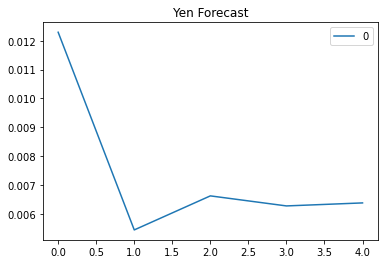

In [20]:
# Plot the forecasted return for the next 5 days
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Yen Forecast")

In [21]:
# Forecasting the Settle Price using an ARIMA Model

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='Date'>

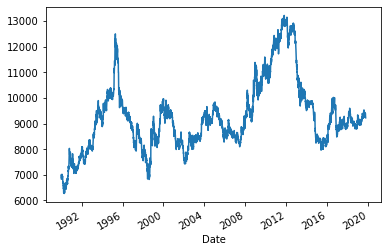

In [23]:
yen_futures['Settle'].plot()

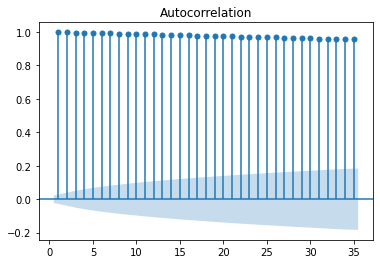

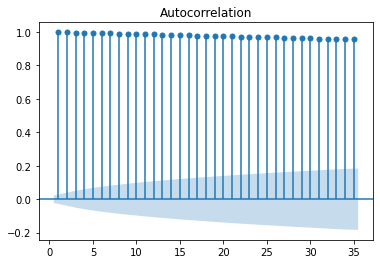

In [24]:
plot_acf(yen_futures['Settle'], zero=False, lags=35)

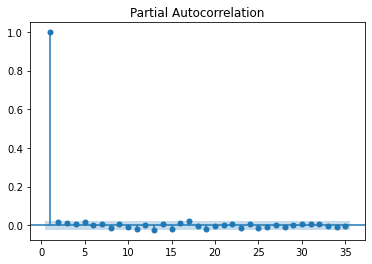

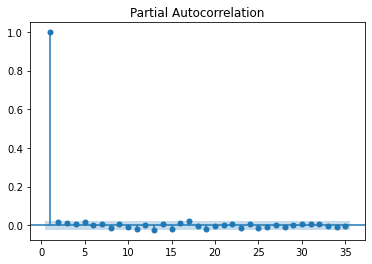

In [25]:
plot_pacf(yen_futures['Settle'], zero=False, lags=35)

In [26]:
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))

C:\Users\danie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\danie\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [27]:
results = model.fit()

C:\Users\danie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Sat, 26 Jun 2021   AIC                          83905.238
Time:                        12:24:22   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3160      0.700      0.451      0.652      -1.056       1.688
ar.L1.D.Settle     0.2822      0.699      0.404      0.687      -1.088       1.653
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2972      0.699     -0.425      0.671      -1.667       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8918           -1.3786j            2.3408           -0.1002
AR.2            1.8918           +1.3786j            2.3408            0.1002
AR.3           -2.2700           -3.0207j            3.7786           -0.3526
AR.4           -2.2700           +3.0207j            3.7786            0.3526
AR.5          -11.0688           -0.0000j           11.0688           -0.5000
MA.1            3.3645           +0.0000j            3.3645            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yen 5-Day Forecast'}>

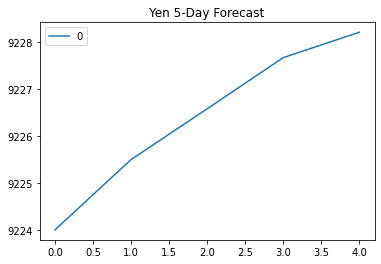

In [29]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Yen 5-Day Forecast")

In [30]:
# Volatility Forecasting with GARCH

In [31]:
from arch import arch_model

<AxesSubplot:xlabel='Date'>

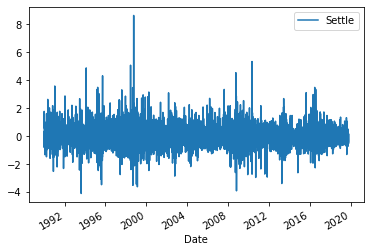

In [32]:
returns.plot()

In [33]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
results = model.fit(disp="off")
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Sat, Jun 26 2021   Df Residuals:                     7514
Time:                        12:24:23   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [34]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [35]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 5
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

C:\Users\danie\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [36]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [37]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


<AxesSubplot:title={'center':'5 Day Yen Forecast of Volatility'}>

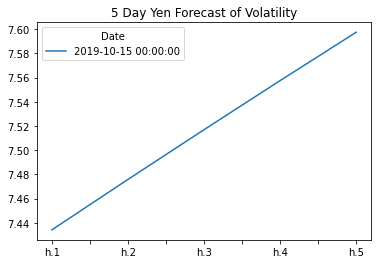

In [38]:
# Plot the final forecast
final.plot(title="5 Day Yen Forecast of Volatility")

In [39]:
# Based on the upward trend in the plot, the volatility of the YEN exchange rate is predicted to increase over the next 5 days.


In [40]:
# I would wait to buy the yen, looks like it risk of yen is going to increase
# I need to understand these model more to use them as trading. 

In [41]:
# Regression Analysis: Seasonal Effects with Sklearn Linear Regression

In [42]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [43]:
yen_futures = pd.read_csv('yen.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [44]:
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


In [45]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='Date'>

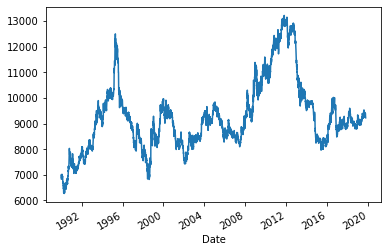

In [46]:
yen_futures['Settle'].plot()

In [47]:
yen_futures['Return'] = yen_futures['Settle'].pct_change() * 100
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473,NaN
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860,0.584197
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699,1.756933
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111,-0.827626
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072,0.129496


In [48]:
# yen_futures.replace(np.inf, np.nan).replace(-np.inf, np.nan)

# # All infinity values are converted to NaNs, then dropped. Starter code says we need this, but not sure where. 

In [49]:
yen_futures['lagged_return'] = yen_futures['Return'].shift()

In [50]:
yen_futures = yen_futures.dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,lagged_return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153,145470,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397,144474,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810,147471,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457,153902,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342,151564,-0.469509,0.151335


In [51]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training

train = yen_futures.loc[:'2017']
test = yen_futures.loc['2018':]

In [52]:
X_train = train['lagged_return'].to_frame()

X_test = test['lagged_return'].to_frame()

y_train = train['Return']

y_test = test['Return']

In [53]:
X_train

,lagged_return
Date,
2014-02-18,0.409123
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
...,...
2017-12-22,0.084621
2017-12-26,0.118370
2017-12-27,0.118230


In [54]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model.fit(X_train,y_train)

LinearRegression()

In [55]:
predicted_Y_values = model.predict(X_test)

In [56]:
Results = y_test.to_frame() 
# this is portion we are checking out prediciton against
Results['Predicted Return'] = predicted_Y_values

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

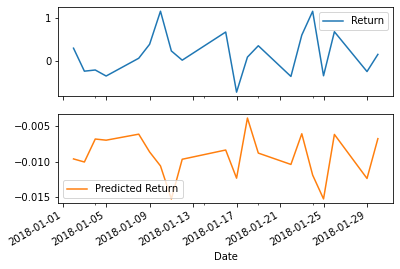

In [57]:
Results[:20].plot(subplots=True)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
mse = mean_squared_error(Results['Return'], Results['Predicted Return'])
rmse = np.sqrt(mse)
rmse 
# this rmse is on the test set, therefore it is called out-of-sample error 

0.41545437184712763

In [60]:
in_sample_results = y_train.to_frame()

in_sample_results['in sample prediction'] = model.predict(X_train)

mse_in_sample = mean_squared_error(in_sample_results['Return'], in_sample_results['in sample prediction'])
rmse_in_sample = np.sqrt(mse_in_sample)
rmse_in_sample 
# this rmse is on the test set, therefore it is called out-of-sample error 

0.5962037920929946

In [61]:
rmse_in_sample > rmse

# since true, I am underfitting

True